___

<a href='https://github.com/eliasmelul/'> <img src='https://s3.us-east-2.amazonaws.com/wordontheamazon.com/NoMargin_NewLogo.png' style='width: 15em;' align='right' /></a>
# Buy 'Till You Die
### Predicting Customer Churn
___
<h4 align="right">by Elias Melul, Data Scientist </h4> 

___
## Marketing Theory
<img src="https://i.ibb.co/GHTPdbc/jeffquote1.jpg" alt="jeffquote1" border="0" width = "500">

Customer centricity is essential for a successful strategy. Without the customer, there are no sales, no revenue, no profit... no company! That's why customer relationship management has become a critical aspect of any company. So what is customer relationship management?

Customer Relationship Management is the process of aligning products and services that a firm offers to an understanding of the customer's needs and goals, use cases, and priorities. Hence, companies should not seek for the right customer for their product, but rather the right product for the customer. That is why in this notebook we will approach CRM from a resonance focus - that is, shift product management or marketing initiatives to fit customer's needs by differentiating on the most significant elements to customers.

Throughout this notebook, we will make reference to the following framework, under the assumption that marketing initiatives try to maximize profit. Fair assumption, right?

<img src="https://i.ibb.co/3TZKD5v/Framework.png" alt="Framework" border="0">

We also need to understand some basic marketing concepts before we begin. More specifically, we will look at Sunil Gupta's definition of <a href="https://www.researchgate.net/publication/237287176_Modeling_Customer_Lifetime_Value">Customer Lifetime Value</a>, CLV for short, and the Customer Equity equation which is based on the framework proposed.

### Customer Lifetime Value and Customer Equity
CLV is typically defined as the present value of all future profits that a customer generates over his/her life with the firm. 

<img src="https://i.ibb.co/0V1FRn4/PVFormula.png" alt="PVFormula" border="0">

While similar to the idea of discounted cash flows used in Finance, the CLV is calculated on individual customers or customer segments, and the CLV incorporates the posibility that a customer may leave (churn) to consume the competitor's product or service. Researchers and practitioners have developed numerous ways of computing the CLV, all valid but with different advantages and dissadvantages. For instance:

<img src="https://i.ibb.co/HgMbP8j/CLVComp.png" alt="CLVComp" border="0">

Gupta and Lehmann (2003, 2005) showed that if margins (p-c) and retention rates are constant over time, using an infinite horizon, one can simplify the CLV through an infinite geometric series to the following:

<img src="https://i.ibb.co/6mzqQw6/CLVGupta.png" alt="CLVGupta" border="0">

In other words, the CLV simplifies to be the profit margin times the margin multiple! So what does the margin mutiple mean? It is simply the amount of times the firm will see a customer generate profits during his/her relationship with the firm.

What are the assumptions that this Infinite Horizon CLV makes?
1. Customers have a constant profit margin, m, over time
2. Customers have a constant retention rate, alpha, over time
3. Discount rate is constant over time
4. Value is estimated over an infinite horizon

This metric is key to quantifying the revenues and benefits of acquiring new customers or retaining them.

Let's look at a quick **CLV example**:

    Let's assume that the retention rate is 90%, and that the discount rate is 10%. What is the margin multiplier?

    If we assume that the margin is $60, what is the CLV?

In [1]:
def margin_multiplier(alpha, discountrate):
    M = alpha/(1+discountrate-alpha)
    return M
def clvCalc(margin, multiplier):
    clv = margin*multiplier
    return clv

In [2]:
print(f"The margin multiple is {round(margin_multiplier(0.9,0.1),2)}.")
print(f"The CLV is ${round(clvCalc(60,margin_multiplier(0.9,0.1)))}.")

The margin multiple is 4.5.
The CLV is $270.


But what if the firm experiences growth over time?

Simple. Gupta and Lehmann have shown that when margins grow at a constant rate g, the CLV becomes:

<img src="https://i.ibb.co/JjF3hNB/CLVgrowth.png" alt="CLVgrowth" border="0">

So let's assume that the company we were talking about experiences 3% growth. How would our evaluation change?

In [3]:
def margin_multiplier(alpha, discountrate, growth = None):
    if growth == None:
        M = alpha/(1+discountrate-alpha)
    else:
        M = alpha/(1+discountrate-alpha*(1+growth))
    return M

In [4]:
print(f"The margin multiple is {round(margin_multiplier(0.9,0.1,0.03),2)}.")
print(f"The CLV is ${round(clvCalc(60,margin_multiplier(0.9,0.1,0.03)))}.")

The margin multiple is 5.2.
The CLV is $312.


**Customer Equity**

At the heart of every marketing initiative, is a drive to increase profits, right?

<img src="https://i.ibb.co/p2mmtHp/Color-Framework.png" alt="Color-Framework" border="0">

The above equation shows the expected customer equity based on the variables in our framework. From here on out, everything that we try to do is intended to increase customer equity, which in turn increases profitability. Mostly, we will deal with customer acquisition and retention. We will start with the latter, but first, let's introduce our data!


## Data Understanding

Throughout the notebook, we will use <a href="https://www.kaggle.com/blastchar/telco-customer-churn">Telco Customer Churn</a> data. It is a sample dataset that include one row per customer including the following features and characteristics of a customer:
* customerID
* gender
* SeniorCitizen - whether a customer is a senior citizen or not (binary)
* Partner - whether the customer is single by legal status or not (Yes or No)
* Dependents - whether the customer has legal dependents of not (Yes or No)
* tenure - the number of months the customer has been with the company
* PhoneService - whether the customer's account includes phone service (Yes or No)
* MultipleLines - whether the customer's account includes multiple lines or just one (Yes, No, or No phone service)
* InternetService - whether the customer's account includes internet serice (DSL, Fiber optic, or No)
* OnlineSecurity - whether the customer's account includes online security service (Yes, No, or No internet service)
* OnlineBackup - whether the customer's account includes online backup service (Yes, No, or No internet service)
* DeviceProtection - whether the customer's account includes protection service (Yes, No, or No internet service)
* TechSupport - whether the customer's account includes IT support (Yes, No, or No internet service)
* StreamingTV - whether the customer's account includes streaming services (Yes, No, or No internet service)
* StreamingMovies - whether the customer's account includes streaming services (Yes, No, or No internet service)
* Contract - the type of contract the customer has with Telco (Month-to-month, One year, or Two year)
* PaperlessBilling - whether the customer signed up to paperless billing (Yes or No)
* PaymentMethod - method of payment of contract (Electronic check, Mailed check, Bank transfer (automatic), or Credit card (automatic)
* MonthlyCharges - the monthly charges (in USD) of each customer
* TotalCharges - the total charges (in USD) Telco has processed for each customer during their lifetime
* Churn - whether the customer has churned or not (Yes or No)

Note that Telco is not an actual company, but rather sample data published by <a href="https://www.ibm.com/support/knowledgecenter/SSEP7J_11.1.0/com.ibm.swg.ba.cognos.ig_smples.doc/c_inst_installc8samples.html">IBM</a>.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
data = pd.read_csv("C:/Users/melul/Desktop/BTYD/WA_Fn-UseC_-Telco-Customer-Churn.csv", index_col=0)

In [7]:
print(data.shape)
data.head()

(7043, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The data seems pretty straightforward, wouldn't you agree? Let's jump in and talk retention!

---

## Retention

### Kaplan Meier Curve - Survival Function

The Kaplan-Meier estimator is a non-parametric statistic used to estimate the survival function from lifetime data. The Kaplan-Meier curve shows the probability of an event being true at a certain time interval - the probability of survival at a specific point in time. It is a good way to approximate the retention rate of a firm whose customers are in a **contractual** setting, such as Telco.

In [8]:
surv_mat = np.zeros(shape=(max(data.tenure)+1,6))
surv_mat = pd.DataFrame(surv_mat, columns=['NumCustomers','NumChurned','NumCensored','NumRemaining','SurvivalRate','SurvivalFunc'])

In [9]:
# Initialize first row at time 0
surv_mat.iloc[0] = (data.shape[0],0,0,data.shape[0],1,1)

In [10]:
# Calculate the number of customers that have churned and the number of customer that we censored for every time period
ten = list(data.tenure)
chu = list(data.Churn)
chu2 = list(data.Churn)
for t in range(len(surv_mat)):
    for l in range(len(chu)):
        if chu[l] == "Yes" and ten[l] == t:
            chu[l] = t
            surv_mat.at[t, 'NumChurned'] = chu.count(t)
        elif chu[l] == "No" and ten[l] == t:
            chu2[l] = t
            surv_mat.at[t, 'NumCensored'] = chu2.count(t)
        

In [11]:
for t in range(1,len(surv_mat)):
    #Calculate the Number of Customers at time t (index)
    surv_mat.at[t, "NumCustomers"] = surv_mat.iloc[t-1,surv_mat.columns.get_loc("NumRemaining")] - surv_mat.iloc[t,surv_mat.columns.get_loc("NumCensored")]
    
    #Calculate the Number of Remaining Customers at time t
    surv_mat.at[t, "NumRemaining"] = surv_mat.iloc[t,surv_mat.columns.get_loc("NumCustomers")] - surv_mat.iloc[t,surv_mat.columns.get_loc("NumChurned")]
    
    #Calculate survival rate for every time period
    surv_mat.at[t, "SurvivalRate"] = surv_mat.iloc[t,surv_mat.columns.get_loc("NumRemaining")] / surv_mat.iloc[t,surv_mat.columns.get_loc("NumCustomers")]
    
    #Survival Function (cumulative survival)
    surv_mat.at[t, "SurvivalFunc"] = surv_mat.iloc[t,surv_mat.columns.get_loc("SurvivalRate")] * surv_mat.iloc[t-1,surv_mat.columns.get_loc("SurvivalFunc")]
    

Great! We have now estimated the survival function. Let's see how it looks.

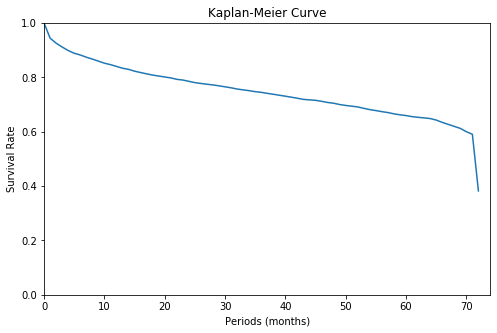

In [12]:
surv_mat['SurvivalFunc'].plot(figsize = (8,5))
plt.ylim(0,1)
plt.xlim(0,74)
plt.xlabel("Periods (months)")
plt.ylabel("Survival Rate")
plt.title("Kaplan-Meier Curve")
plt.show()

Awesome! Above we can see the Kaplan-Meier curve - the survival function. Like we explained previously, it shows the probability of a customer still being active with Telco over time. As expected, it decreases with tenure, with a higher significant decrease in the first several months and then eroding over time.

**How can we approximate the retention rate using Kaplan Meier?** 

We will utilize an optimizer to minimize the sum of the absolute error between the actual retention at the end of every year and the expected retention, which, since we assumed that customers have a constant retention rate over time in our CLV function, we will equal the retention rate to the power of the year in question.

In [13]:
months = int(round(surv_mat.shape[0]/12,0))
year_vals = np.zeros(shape=(months,4))
for y in range(len(year_vals)):
    year_vals[y,0] = y+1
    year_vals[y,1] = surv_mat.SurvivalFunc[(y+1)*12]
# We create an exception for the last year, and move the retention rate to the month prior to that year's completion
year_vals[(months-1),1] = surv_mat.SurvivalFunc[((y+1)*12)-1]

Now that we have created the matrix full of zeros and included the year number and the actual retained value, let's create the optimization function.

To define a Solver-type (Excel) of problem in python, one must define a function which has the value that will be changed as the input of the function. In our case, that input is alpha, from which we will calculate the estimated constant retention. Once we have the estimated retention based on the alpha, we can calculate the absolute error per year and return the sum of all errors. The optimizer will deal with minimizing such error later on! For now, let's define the function!

In [14]:
from scipy.optimize import minimize

In [15]:
def absoluteSum(alpha):
    #Loop through all the rows in the year_vals matrix
    for y in range(len(year_vals)):
        #Calculate the estimated retention based on the alpha inputed in the function
        year_vals[y,2] = alpha**year_vals[y,0]
        #Calculate the absolute error between the estimated and the actual retention
        year_vals[y,3] = abs(year_vals[y,2] - year_vals[y,1])
    # Return the sum of the absolute errors    
    abserrors = sum(year_vals[:,3])
    return abserrors

Great! One minor thing. We have to define the bounds for our input (alpha). It has to be greater than 0 and less than 1. We will also initialize the alpha value for the optimization function. We simply put 0.5 and called it aleph, but you can define it as whatever number you please!

In [16]:
#Define bounds for out input and 
bound = [(0,1)]
aleph = 0.5

Awesomesauce! Let's try out the optimization function, minimum. We input the objective function first, then the initial value for the value(s) to be changed - our alpha -, the optimization method, and the bounds for the input.

In [17]:
res = minimize(absoluteSum,aleph,method='SLSQP',bounds=bound)
print(f"Our alpha equals: {round(res.x[0]*100,2)}%")

Our alpha equals: 91.6%


Wow! 91.6% is a pretty good retention rate. What this means is that every year, we should expect the beginning customer base to decrease by 8.4%. Let's exemplify this.

Assume Telco has a profit margin of 17%, as <a href="https://www.investopedia.com/ask/answers/060215/what-average-profit-margin-company-telecommunications-sector.asp">Investopedia</a> says about the Telecommunication industry. Let's also assume no growth and a discount rate of 5%. What would our margin multiplier be? CLV?

In [18]:
marg = margin_multiplier(res.x[0], 0.05)
#Calculate mean monthly revenue per customer and annualize it
meanRev = data.MonthlyCharges.mean()*12
margProf = meanRev * 0.17
#Calculate the CLV
clv = clvCalc(margProf,marg)

print(f"The margin multiplier is: {round(marg,4)}")
print(f"The mean annualized revenue per customer is: ${round(meanRev,2)}")
print(f"The Customer Lifetime Value is: ${round(clv,2)}")

The margin multiplier is: 6.834
The mean annualized revenue per customer is: $777.14
The Customer Lifetime Value is: $902.87


What if we could create an incentive program that increases retention by 5%, such as a loyalty/reward program. What would happen to our margin multiplier and CLV under the same assumptions?

In [19]:
marg = margin_multiplier(res.x[0]+0.05, 0.05)
#Calculate mean monthly revenue per customer and annualize it
meanRev = data.MonthlyCharges.mean()*12
margProf = meanRev * 0.17
#Calculate the CLV
clv = clvCalc(margProf,marg)

print(f"The margin multiplier is: {round(marg,4)}")
print(f"The mean annualized revenue per customer is: ${round(meanRev,2)}")
print(f"The Customer Lifetime Value is: ${round(clv,2)}")

The margin multiplier is: 11.4954
The mean annualized revenue per customer is: $777.14
The Customer Lifetime Value is: $1518.71


Incredible! Our margin multiplier and CLV almost doubled... and that's just with a 5% increase in retention! 
The importance of rentention has never been so obvious.


---

### BG/NBD
The above data had one benefit that is not common in all businesses: it was contractual data. This entails that we know whether a customer has churned and therefore can calculate or at least estimate their tenure. The benefits of such data are obvious. However, since this is not always the case, we are going to look at a model that uses non-contractual data: BG/NBD Model - a derivation of the Pareto/NBD model which has been proven to be hard to implement. This model only needs:
1. The number of transactions a customer has made **after** their first transaction.
2. The time of a customer's last purchase.
3. How long the customer been tracked for. 

One of the key differences between the Pareto/NBD and the BG/NBD model is based on the story being told about how and when customers become inactive. The Pareto timing model assumes that customer churn can occur at any point in time, independetly of the occurrence of actual purchases. However, the BG/NBD model assumes that churn can only occur immediately after a purchase, hence, we can model the timing model as a betageometric model. 

In the next section, we explain the model in a semi-mathematical and conceptual way. However, there is a small section thereafter called the _Technical Summary_ that briefly goes over the functions used in this model. Remember, you can access the <a href="http://brucehardie.com/papers/018/fader_et_al_mksc_05.pdf">original article</a>. If you are not interested in this model for estimating retention, feel free to skip to the next section: Customer Acquisition.

Note that in an industry or company where active buyers are either uncommon or very slow in making their purchases, the BG/NBD model will not perform well compared to the Pareto/NBD.

**Conceptual Summary**

The BG/NBD model quantifies the lifetime value of a customer by assessing the expected number of transactions s/he will have in the future as long as s/he has not churned. For any given customer there are two options: (1) the customer purchases or does not purchase again, and (2) the customer churns or does not churn. These two options are probabilisitic, meaning that there is a probability associated with the customer pruchasing at a given period and a different probability of a customer churning after a purchase. 

The model assumes the following:
1. Until a customer churns, the number of transactions made by a customer follows a <a href="https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-262-discrete-stochastic-processes-spring-2011/course-notes/MIT6_262S11_chap02.pdf">Poisson process</a> - a simple and widely used stochastic process for modeling the times at which arrivals enter a system. 
    
    So at every period (week) in a defined time interval (one year = 52 weeks), the customer decides whether to pruchase or not. The number of purchases a customer makes is dependent on each customer's probability distribution around lambda, the arrival rate.
   

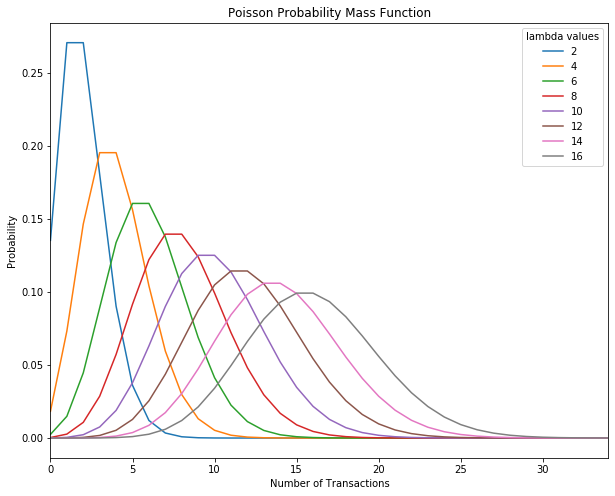

In [20]:
from scipy.stats import poisson, expon, nbinom, gamma

lmbdas = [2,4,6,8,10,12,14,16]
complete = []
for l in lmbdas:
    plot1 = []
    for t in range(0,35):
        plot1.append(poisson(l).pmf(t))
    complete.append(plot1) 
complete = pd.DataFrame(complete, index=[2,4,6,8,10,12,14,16]).T
complete.plot(figsize=(10,8))
plt.title("Poisson Probability Mass Function")
plt.xlabel("Number of Transactions")
plt.ylabel("Probability")
plt.legend([2,4,6,8,10,12,14,16], title="lambda values")
plt.show()

This graph simply shows the probability associated with the number of transactions of a customer given different arrival rates - lambdas. Makes sense, yes?

2. The probability that a customer will purchase follows a Gamma distribution. Similarly, it is the time (the wait time) until the customer purchases again. Therefore, since the number of transaction (from 1) is dependent on the probability of purchase at any given point, we will simulate a Poisson distribution where the rate of arrival (rate of purchasing) - lambda -, is modeled with a Gamma distribution. 
    
    Note that there is no general concensus as to what the scale parameter should be. This becomes part of the modeling section. In the display, we assume a shape of 5 and a scale of 1.

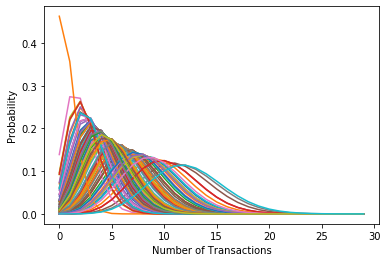

In [21]:
shap = 5
scal = 1

#simulate over 100 customers
for c in range(100):
    pprocess = poisson(np.random.gamma(shape=shap, scale=scal))
    complete = []
    for t in range(30):
        complete.append(pprocess.pmf(t))
    plt.plot(complete)
    plt.xlabel("Number of Transactions")
    plt.ylabel("Probability")

3. There is a probability, p, that a customer becomes innactive after any transaction. This dropout rate is distributed across transactions based on a shifted Geometric distribution. In simple terms, the distribution explains that the higher the amount of transactions a customer makes, the higher the probability of being active - ie not churned.


4. Heterogeneity in the probability of churning follows a Beta distribution. In other words, each customer has a different probability of having churned after a specific amount of transactions.


5. Lambda and the churn probability, p, are independent across customers.

    
If you want to understand the model deeply, check out the <a href="http://brucehardie.com/papers/018/fader_et_al_mksc_05.pdf">original article</a>.

---
    
**BG/NBD Modeling**

Let's get the model implemented! Recall this model only needs:
1. The number of transactions a customer has made **after** their first transaction.
2. The time of a customer's last purchase.
3. How long has the customer been tracked for. 

Since our Telco data does not fit, we will use sample data from the _lifetime_ library. **However**, we assume that is a Telco dataset since we are going to go through the BG/NBD model using a use case.

##### Case: Telco - Teckie Case

As a large corporation, Telco has multiple services and products. One of their lines of products is online movie rentals - Telco Video. A customer can log in into Telco Video and rent any movie in the platform for only $3 for a span of 48hrs.

Nine months ago, Telco Video started advertising their services on Teckie's website - a company with 50 million frequent online customers. Everything seems to be going great, but executives at Telco Video do not know whether the deal was worth it or not. Now, Teckie has offered Telco Video to extend the advertising deal for a full year on their site. This promotional deal costs $2.3 million. Should Telco take this deal?

We assume that the average purchase rate is $3 (weekly) - 1 movie a week, and that Telco's profit margin is %17. Let's also assume that, based on an analysis done on Teckie's data, 80% of subscribers see the ads, and that 3% of the ad viewers become Telco customers.  

To answer the question of whether Telco Video should take the deal, we need to quantify the expected returns from the deal and see if these outweight the costs.

Using the data from the first 9 months (39 weeks), we will create a BG/NBD model and predict the net present value of revenue for all customers, ultimately determining the value of the deal and helping Telco Video executives make a decision.

In [22]:
from lifetimes.datasets import load_cdnow_summary
LastPurchase = load_cdnow_summary(index_col=[0])
LastPurchase.columns = ["Transactions","LastPurchase","Tracked"]
LastPurchase.head()

,Transactions,LastPurchase,Tracked
ID,,,
1,2,30.43,38.86
2,1,1.71,38.86
3,0,0.00,38.86
4,0,0.00,38.86
5,0,0.00,38.86


Every row of the data represents a customer. Each customer, has the number of transactions done after first purchase (Transactions), the time of last purchase (LastPurchase) and the amount of time said customer has been tracked for (Tracked).

Next, we import and fit the model. This will tell us the optimal parameters for fitting the beta and geometric distributions. Subsequently, we will calculate the probability of a customer not having churned (being alive) and the expected number of transactions s/he will generate in the upcoming year (52 weeks).

In [23]:
from lifetimes import BetaGeoFitter
from lifetimes.plotting import plot_period_transactions, plot_frequency_recency_matrix, plot_probability_alive_matrix, plot_history_alive

bgModel = BetaGeoFitter()
bgModel.fit(LastPurchase['Transactions'], LastPurchase['LastPurchase'], LastPurchase['Tracked'])

bgModel.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.242593,0.012557,0.217981,0.267205
alpha,4.413532,0.378221,3.672218,5.154846
a,0.792886,0.185719,0.428877,1.156895
b,2.425752,0.705345,1.043276,3.808229


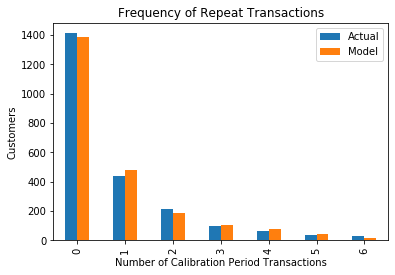

In [24]:
plot_period_transactions(bgModel)

    The differences between actual and predicted repeat transactions are marginal for each period, indicating a good fit of the model.

Phenomenal! Now that we have fitted our distributions based on our data, we can take a look at E[Y(t)] and Prob(Active). That is, the expected number of transactions a customer will do over a year, and the probability that the customer is still alive right now (week 39). Check out the Technical Summary at the end of this section to see the mathematical formulas relevant to this model, or check out the original paper!

In [25]:
def bgnbd_expectations(x, t_x, T, t):
    r, alpha, a, b = bgModel.summary.iloc[:,0]
    aa = r+x
    bb = b+x
    cc = a+b+x-1
    z = t/(t+alpha+T)
    terms = np.zeros(shape=(151))
    terms[0]=1
    for i in range(1,len(terms)):
        terms[i] = terms[i-1]*(aa+i-1)*(bb+i-1)/((cc+i-1)*i)*z
    f2_1 = sum(terms)
    if x > 0:
        rpos = 1
    else:
        rpos = 0
        
    eyt = ((a+b+x-1)/(a-1))*(1-(((alpha+T)/(alpha+T+t))**(r+x))*f2_1)/(1+(rpos*(a/(b+x-1)))*((alpha+T)/(alpha+t_x))**(r+x))
    
    prob = 1/(1+(rpos*(a/(b+x-1))*((alpha+T)/(alpha+t_x))**(r+x)))
    return eyt, prob

In [26]:
alive = []
nextyear = []
for i, row in LastPurchase.iterrows():
    ex, proAl = bgnbd_expectations(row.Transactions, row.LastPurchase, row.Tracked, 52) #52 weeks in a year
    alive.append(proAl)
    nextyear.append(ex)
LastPurchase['ProbabilityAlive'] = alive
LastPurchase['ExpectedTransactions'] = nextyear
LastPurchase.head()

,Transactions,LastPurchase,Tracked,ProbabilityAlive,ExpectedTransactions
ID,,,,,
1,2,30.43,38.86,0.726609,1.558584
2,1,1.71,38.86,0.212227,0.259907
3,0,0.00,38.86,1.000000,0.251666
4,0,0.00,38.86,1.000000,0.251666
5,0,0.00,38.86,1.000000,0.251666


Now, we can leverage the BG/NBD model and estimate the net present value of the revenue generated from the deal and compare it to the cost. Note that by definition, when the number of repeat transactions is zero, there is a 100% probability the customer is alive. This has to do with our assumptions to fit a BetaGeometric process instead of a Pareto process. Therefore, we will use a subset of data that only includes repeat customers - acquired customers - to estimate the NPV of Revenue, which is:

<img src="https://i.ibb.co/F521VBB/npvfunc.png" alt="npvfunc" border="0">


In [27]:
activity = LastPurchase[LastPurchase['Transactions']>0]

In [28]:
purchase = 3
grossMargin = .17
d = 0.03
activity['NPVRevenue'] = activity.apply(lambda activity: activity['ExpectedTransactions']*purchase*grossMargin*(activity['ProbabilityAlive']/(1+d-activity['ProbabilityAlive'])), axis=1)

In [29]:
# If Teckie has 100 million customers and 90% see adds 
# and only 3% of those who saw the ads are transformed into Telco's customers...
newCustomers = 50000000*0.8*0.02

# Total expected NPV adjusted for this promotional deal:
totalNPV = activity.NPVRevenue.sum()*(newCustomers/len(activity))
costDeal = 2.3 #Millions

print(f"Total number of new customers: {newCustomers}")
print(f"NPV Revenue from ad transforms ${round(totalNPV/1000000,2)}M")
print(f"Cost of Deal: ${costDeal}M")
print(f"Net Value of Deal: ${round(round(totalNPV/1000000,2)-costDeal,2)}M")
print(f"Return on Investment: {round((round(totalNPV/1000000,2)-costDeal)*100/costDeal,2)}%")
print(f"Median Retention {round(activity.ProbabilityAlive.median()*100,2)}%")
print(f"Median transactions in first year: {activity.Transactions.median()}")

Total number of new customers: 800000.0
NPV Revenue from ad transforms $2.89M
Cost of Deal: $2.3M
Net Value of Deal: $0.59M
Return on Investment: 25.65%
Median Retention 58.29%
Median transactions in first year: 2.0


So, should Telco Video take the deal? 

Absolutely! Based on our analysis on the newly acquired customers, we should expect:
* Returns of $2.89 million over the next year. 

* Profit of $590,000 
* Return of Investment of 25.65%.

___

For educational purposes, let's visualize how BG/NBD models behavior over time, and how predictions may vary accordingly. 

Say that Telco Video have two customers, Customer1 and Customer2, with different purchasing habits. Customer2 buys more often while Customer1 has more recent transactions with the firm. We are currently in week 40.

Let's generate values for this hypothetical customers and model their retention and expected transaction curves.

In [30]:
cust1 = {"day":[27,34]}
cust2 = {"day":[4,6,8,10,12,15,17,19,27]}
cust1 = pd.DataFrame(cust1)
cust2 = pd.DataFrame(cust2)

Text(0, 0.5, 'Expected Transactions')

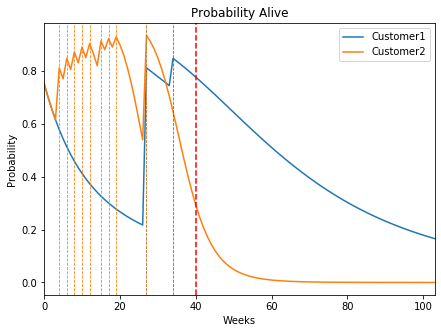

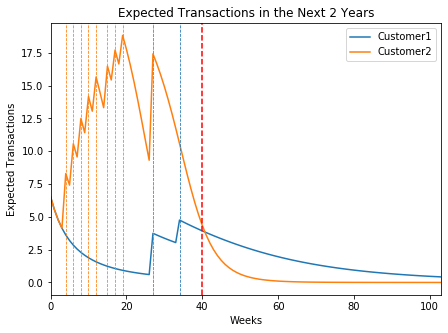

In [31]:
lastday1 = 0
ntrans1 = 1
probable1 = []
lastday2 = 0
ntrans2 = 1
probable2 = []
expyear1 = []
expyear2 = []

for time in range(0,104):
    if time in cust1.day.values:
        lastday1 = time
        ntrans1 += 1
    if time in cust2.day.values:
        lastday2 = time
        ntrans2 += 1
    ex1, pr1 = bgnbd_expectations(ntrans1,lastday1,time,104)
    
    probable1.append(pr1)
    expyear1.append(ex1)
    
    ex2, pr2 = bgnbd_expectations(ntrans2,lastday2,time,104)
    
    probable2.append(pr2)
    expyear2.append(ex2)
    
    
newdict = {"Customer1":probable1,"Customer2":probable2}
newdf = pd.DataFrame(newdict)
newdf.plot(figsize=(7,5))
for b in cust1.day.values:
    plt.axvline(x=b, linewidth=0.8, linestyle = '--')
for o in cust2.day.values:
    plt.axvline(x=o, linewidth=0.8, linestyle = '--', color='tab:orange')   
plt.axvline(x=40, linestyle='--',color='r')
plt.title("Probability Alive")
plt.xlabel("Weeks")
plt.ylabel("Probability")

expdict = {"Customer1":expyear1,"Customer2":expyear2}
expdf = pd.DataFrame(expdict)
expdf.plot(figsize=(7,5))
for b in cust1.day.values:
    plt.axvline(x=b, linewidth=0.8, linestyle = '--')
for o in cust2.day.values:
    plt.axvline(x=o, linewidth=0.8, linestyle = '--', color='tab:orange')  
plt.axvline(x=40, linestyle='--',color='r')
plt.title("Expected Transactions in the Next 2 Years")
plt.xlabel("Weeks")
plt.ylabel("Expected Transactions")

While Customer2 was more active in the past, his innactivity for 13 weeks has drastically decreased our probability of him/her being alive as of Week40 (RED) - that is, the probability that he has not churned. Instead, Customer1 has a much higher probability of being alive than Customer2 due to the recency of transactions and the fitted behavioral purchasing patterns which are slow. 

For more examples and derivations of the use of the BG/NBD model, take a look at these posts:
1. <a href="https://towardsdatascience.com/predicting-customer-lifetime-value-with-buy-til-you-die-probabilistic-models-in-python-f5cac78758d9">Predicting Customer Lifetime Value with “Buy ‘Til You Die” probabilistic models in Python</a> - comprehensive BG/NBD model explenation.
2. <a href="https://medium.com/liv-up-inside-the-kitchen/looking-at-retention-lifetime-value-with-data-science-1fc884e6a4ad">Looking at retention & lifetime value with data science</a>

Take a look at the Technical Summary if you want to see the mathematical formulas relevant to the modeling of the BG/NBD model.


**Technical Summary**

1. The number of transactions made by a customers follows a Poisson process with trasaction rate lambda.
    This is the same as exponentially distributed  time between trasactions 
<img src="https://i.ibb.co/1KHp2kF/1-Poisson-Process.png" alt="1-Poisson-Process" border="0">


2. Heterogenerity ("distribution") in lambda follows a gamma distribution with PDF:
<img src="https://i.ibb.co/n7RXPpd/2-Gamma-Dist.png" alt="2-Gamma-Dist" border="0">


3. After a transaction, a customer can become innactive. The probability of that occuring is denoted by the letter p. Therefore, the point at which the customer "drops out" is distributed across transactions according to a (shifted) geometric distribution with PMF:
<img src="https://i.ibb.co/C6qLck8/3-PINactive.png" alt="3-PINactive" border="0">


4. Heterogeneity ("distribution"/variation) in p follows a Beta distribution with PDF:
<img src="https://i.ibb.co/wsJ2vgb/4-Beta-Dist.png" alt="4-Beta-Dist" border="0">
    The transaction rate lambda and the dropout probability p vary independently accross customers.
    
    
5. Therefore, the expected number of transactions in a time period t is:
<img src="https://i.ibb.co/sgKYK29/5-Expeted-Transactions.png" alt="5-Expeted-Transactions" border="0">
    This is central to computing the expected transaction volume over time


6. And the expected number of transactions of an individual with certain characteristics during the specified time period is:
<img src="https://i.ibb.co/yNPKFfy/6-Expected-Volume.png" alt="6-Expected-Volume" border="0">
    In other words, how much is an individual going to purchase in the future?

___

### What did we learn in this section?

* We learned about customer retention and how effective and important it is to the profitability of a company. 

* We learned how to use the Kaplan-Meier model in a contractual setting to estimate the CLV, and we learned how to create an BG/NBD model for a non-contractual business setting, and get the expected transactions and probability of retention for every customer based on their past behavior. 

* We saw some examples of how these models can be used to drive decisions and help businesses allocate resources, catalyze growth, and help executives quantify proposals.

* Next, we will go into customer acquisition, another critical part of our CRM framework!

__________


## Customer Acquisition

Customer Acquisition comes in many shapes and forms - it could be content marketing, social media, search marketing, and email marketing, among others. Regardless of its form, these marketing campaigns target potential customers - humans - and humans have various decision mechanisms that vary depending on what they are purchasing. 

In marketing, a common tool to understanding the process of turning leads into customers - potential customers into actual customers, that is - is called the Marketing Funnel. In this method, customers start with a set of potential brands and methodically reduce that number to make a purchase. Let's dive deeper.

<img src="https://i.ibb.co/1dCHDHn/mktg-Funnel.png" alt="mktg-Funnel" border="0">

The marketing funnel, shown above, has six stages, with each stage having a lesser number of candidates than the last.
1. **Awareness** - stage at which firms raise awareness about a product or service through marketing campaigns, customer research, events, advertising, social media, and more. This generates a number of interested potential customers.
2. **Interest** - once leads are generated, potential customers learn more about the company and products or services. In this stage, marketers can nurture leads through emails, newsletters and targeted content.
3. **Consideration** - at this stage, interested customers become qualified leads that are considering purchasing the product. Here, marketers continue to nurture their relationships with qualified leads,  informing leads with case studies and free trials.
4. **Intent** - after a survey, product demo or by simply adding an item to the shopping cart, a customer demonstates a legitimate interest in purchasing the product. If they have demonstrated said interest, they're in the intent state, in which marketers must make a good case why their product is the best choice for the customer, as compared to the competition's products.
5. **Evaluation** - this is the stage in which buyers are making their final decision about the purchase. Marketers and sales work closely to convince the customer to purchase their brand's product/service.
6. **Purchase** - the sales transaction is completed!

While the marketing funnel can be a great conceptual tool and framework, it is often the case that customers follow a Customer Decision Journey process when making their purchasing options. This is because different customers (and different segments), have different decision processes.

<img src="https://i.ibb.co/0GgxnGg/CDJ.png" alt="CDJ" border="0">

Above, the Customer Decision Journey (CDJ) has six stages within a loop with a "shortcut" in the loop for repeat customers. CDJ exemplifies a common approach to purchasing decisions, emphasizing the importance of word of mouth during this process.

1. The customer begins by considering brands and products based on perceptions and exposure, typically generated by paid media. 
2. S/he then passes to an active evaluation of the brands and products, which includes gathering information from any sources, including owned media where they can see people's opinions and reviews about the product. 
3. The next stage is the point-of-purchase stage, in which customers select the brand they want to purchase from. 
4. Subsequently, the customer enjoys and engages with the product s/he just baught, building expectations to inform the next decision journey. 
5. At some point in the future, something may occur that triggers the customer to advocate for the product to another person, which establishes a new relationship between the customer, the potential customer and the brand. 
6. At this point, a new lead has been generated through advocacy and the previous customer has entered the loyalty loop, where s/he may become a repeat purchase.

In [37]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Next, we will define a function that determines the expected number of transactions an individual will do in a given time period, and the probability of that customer being alive at that given time.

You can find the derivation of all the functions in the appendix of <a href="http://www.brucehardie.com/papers/bgnbd_2004-04-20.pdf">"Counting Your Customers" the Easy Way</a>. 

In [32]:
from scipy.special import gammaln

In [33]:
LastPurchase = pd.read_csv("C:/Users/melul/Desktop/BTYD/RawBGNBDData.csv", header=0, index_col=0)
LastPurchase.columns = ["Transactions","LastPurchase","Tracked"]

In [34]:
LastPurchase.head()

,Transactions,LastPurchase,Tracked
ID,,,
1,2,30.43,38.86
2,1,1.71,38.86
3,0,0.00,38.86
4,0,0.00,38.86
5,0,0.00,38.86


In [35]:
def bgnbd(parameters):
    r, alpha, a, b = parameters
    reti = []
    for i, row in LastPurchase.iterrows():
        ln1 = gammaln(r+row.Transactions)-gammaln(r)+(r*np.log(alpha))
        ln2 = gammaln(a+b)+gammaln(b+row.Transactions)-gammaln(b)-gammaln(a+b+row.Transactions)
        ln3 = -(r+row.Transactions)*np.log(alpha+row.Tracked)
        if row.Transactions > 0:
            ln4 = np.log(alpha)-np.log(b+row.Transactions-1)-(r+row.Transactions)*np.log(alpha+row.LastPurchase)
            dd = 1
        elif row.Transactions == 0:
            ln4 = 0
            dd = 0
        lntot = (ln1 + ln2 + np.log(np.exp(ln3)+(dd*np.exp(ln4))))*-1
        reti.append(lntot)
    return(sum(reti))

In [36]:
#Define bounds for out input and 
bound = [(0.0000001,10),(0.0000001,10),(0.0000001,10),(0.0000001,10)]
erre = [1,1,1,1]
res = minimize(bgnbd,erre,method='SLSQP', bounds = bound,options={'disp':True})
print(f"Our alpha equals: {round(res.x[0]*100,5)}%")

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 4140.470990956655
            Iterations: 8
            Function evaluations: 26
            Gradient evaluations: 4
Our alpha equals: 20.60337%
